# Titanic
using Decision Tree

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [40]:
train_df = pd.read_csv('train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [149]:
test_df=pd.read_csv('test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Filling null values

Text(0.5, 1.0, 'Missing Data')

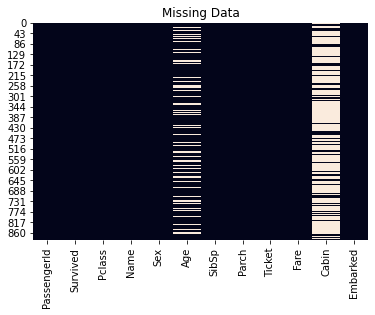

In [41]:
sns.heatmap(train_df.isnull(),cbar=False).set_title('Missing Data')

In [42]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
train_df.Embarked.fillna(train_df.Embarked.mode()[0],inplace=True)

In [44]:
train_df.Cabin=train_df.Cabin.fillna('NA')

In [45]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)

In [47]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:>

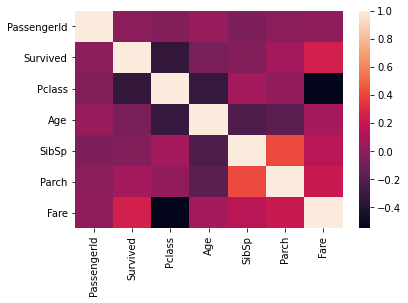

In [48]:
sns.heatmap(train_df.corr())

In [49]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Text(0.5, 1.0, 'Missing Data')

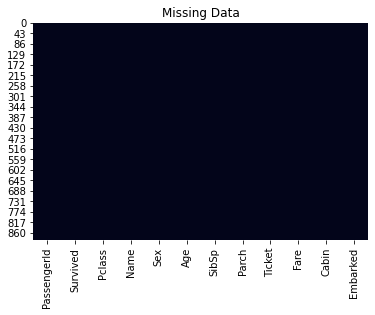

In [50]:
sns.heatmap(train_df.isnull(),cbar=False).set_title('Missing Data')

In [52]:
train_df['Sex'].replace(to_replace=['male','female'],value=[0,1],inplace=True)

In [53]:
train_df['Embarked'].replace(to_replace=['S','C','Q'],value=[0,1,2],inplace=True)

## Pre processing

In [54]:
X=train_df[[ 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']].values
X[0:4]

array([[ 0., 22.,  1.,  0.,  0.],
       [ 1., 38.,  1.,  0.,  1.],
       [ 1., 26.,  0.,  0.,  0.],
       [ 1., 35.,  1.,  0.,  0.]])

In [55]:
train_df['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [56]:
X[0:2]

array([[ 0., 22.,  1.,  0.,  0.],
       [ 1., 38.,  1.,  0.,  1.]])

In [63]:
y=train_df['Survived']
y[0:4]

0    0
1    1
2    1
3    1
Name: Survived, dtype: int64

## Train Test Split

In [121]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)
print(f'Train Set: {X_train.shape,y_train.shape}')
print(f'Test Set: {X_test.shape,y_test.shape}')

Train Set: ((712, 5), (712,))
Test Set: ((179, 5), (179,))


## Modelling

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=4)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [124]:
prediction = dtc.predict(X_test)
X_test[0]

array([ 1., 30.,  0.,  0.,  0.])

In [125]:
prediction

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [126]:
y_test

257    1
4      0
488    0
651    1
512    1
      ..
32     1
792    0
733    0
706    1
802    1
Name: Survived, Length: 179, dtype: int64

In [127]:
from sklearn import metrics
print(f'Accuracy of the model is {metrics.accuracy_score(y_test,prediction)}')

Accuracy of the model is 0.8547486033519553


## Visualization

In [128]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

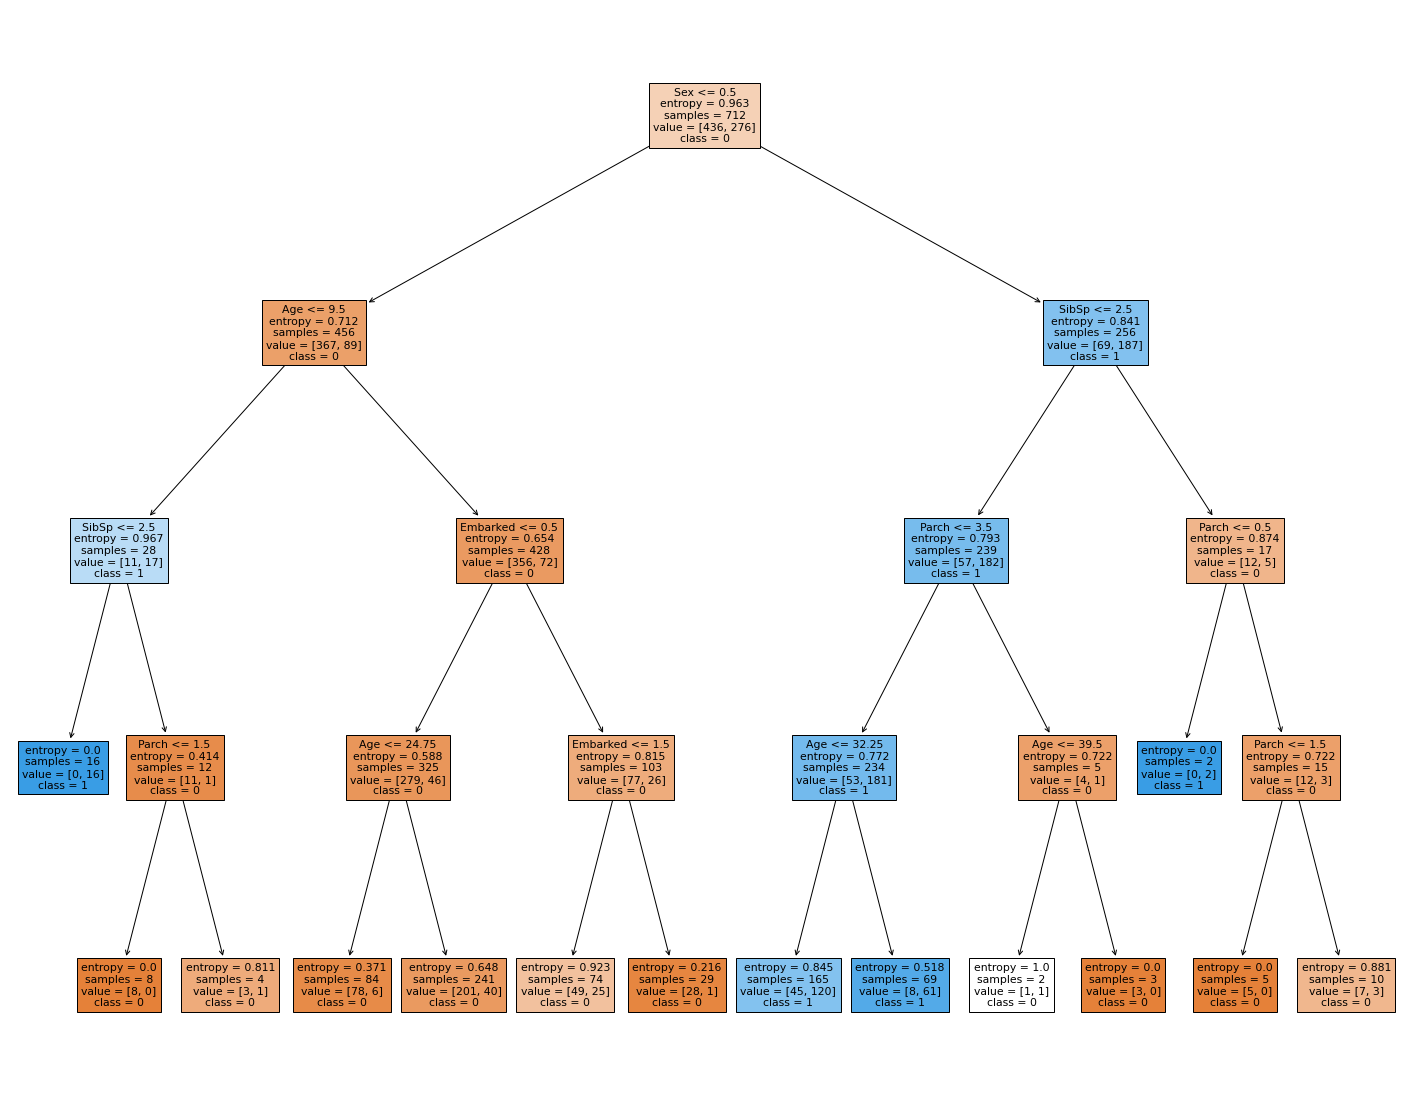

In [132]:
featureNames = ['Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc,feature_names=featureNames, class_names=np.unique(y_train).astype(str), filled=True)

## Testing using test dataset

In [150]:
test_df2=test_df[['Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
test_df2.head()

,Sex,Age,SibSp,Parch,Embarked
0,male,34.5,0,0,Q
1,female,47.0,1,0,S
2,male,62.0,0,0,Q
3,male,27.0,0,0,S
4,female,22.0,1,1,S


In [152]:
test_df2['Age'].fillna(test_df2['Age'].mean(), inplace=True)

In [154]:
test_df2['Sex'].replace(to_replace=['male','female'],value=[0,1],inplace=True)

In [156]:
test_df2['Embarked'].replace(to_replace=['S','C','Q'],value=[0,1,2],inplace=True)

In [158]:
test_df2.isna().sum()

Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [160]:
test_df2.head()

,Sex,Age,SibSp,Parch,Embarked
0,0,34.5,0,0,2
1,1,47.0,1,0,0
2,0,62.0,0,0,2
3,0,27.0,0,0,0
4,1,22.0,1,1,0


In [163]:
test_data=np.asanyarray(test_df2)
test_data[0]

array([ 0. , 34.5,  0. ,  0. ,  2. ])

In [164]:
prediction2 = dtc.predict(test_data)

In [166]:
prediction2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [171]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': prediction2})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
